***BASIC STATISTICS FOR ANALYSIS***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import math

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf


In [5]:
symbol = 'AAPL'
market = '^GSPC'
start = '2014-01-01'
end = '2024-01-01'

#Read Data
df = yf.download(symbol, start, end)
dfm = yf.download(market, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
df.columns = df.columns.get_level_values(0)
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,17.192825,17.314048,17.158324,17.272087,234684800
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800
2014-01-07,16.785946,16.969955,16.720051,16.918980,317209200
2014-01-08,16.892250,16.957523,16.743986,16.747714,258529600


In [7]:
dfm.columns = dfm.columns.get_level_values(0)
dfm.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,1831.979980,1845.859985,1827.739990,1845.859985,3080600000
2014-01-03,1831.369995,1838.239990,1829.130005,1833.209961,2774270000
2014-01-06,1826.770020,1837.160034,1823.729980,1832.310059,3294850000
2014-01-07,1837.880005,1840.099976,1828.709961,1828.709961,3511750000
2014-01-08,1837.489990,1840.020020,1831.400024,1837.900024,3652140000


In [8]:
df.shape

(2516, 5)

In [9]:
new_df = pd.DataFrame({symbol : df['Close'], market : dfm['Close']}, index = df.index)

#compute returns
new_df[['stock_returns', 'market_returns']] = new_df[[symbol, market]] / new_df[[symbol, market]].shift(1) -1
new_df = new_df.dropna()
covmat = np.cov(new_df["stock_returns"], new_df["market_returns"])

#calculate measures
beta = covmat[0,1]/covmat[1,1]
alpha = np.mean(new_df['stock_returns']) - beta*np.mean(new_df['market_returns'])

print('Beta: ', beta)
print('Alpha: ', alpha)

Beta:  1.1899099939489355
Alpha:  0.0005905214127376028


In [10]:
close = df['Close']

***MEAN THE AVERAGE***

In [11]:
mean = np.mean(close)
print('Mean of Close: ', mean)

Mean of Close:  75.43264201411382


***MEDIAN IS THE MIDDLEMOST VALUE***

In [12]:
median = np.median(close)
median

np.float64(45.756683349609375)

***MODE: MOST FREQUENT VALUE VALUE IN THE SERIES***

In [13]:
mode = stats.mode(close, keepdims = True)   #keepdims ensures output is always array-like
print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 18.52147674560547 with a count of 2


***RANGE IS A MEASURE OF HOW SPREAD APART THE VALUES ARE***

In [14]:
range_of_stock = np.ptp(close)
range_of_stock

np.float64(181.13521480560303)

***VARIANCE IS A MEASURE OF HOW VARIABLE THE DATA IS***

In [15]:
variance = np.var(close)
variance

np.float64(3170.5339321713614)

***STANDARD DEVIATION IS THE SQ ROOT OF THE VARIANCE AND IS A MEASURE HOW THE DATA IS SPREAD OUT***

In [16]:
standard_deviation = np.std(close)
standard_deviation

np.float64(56.3074944582989)

***STANDARD ERROR is the mean estimates the variability between sample means that you would obtain if you took multiple samples from the same population***

In [17]:
standard_error = stats.sem(close)
standard_error

np.float64(1.1227865669038024)

***Z-score indicates how many standard deviations a data point is from the mean, and whether it lies above (positive Z) or below (negative Z) the mean***

In [18]:
z = np.abs(stats.zscore(close))
print(z)

[1.03431732 1.04102433 1.03939592 ... 2.06567844 2.07325966 2.0547475 ]


***CONTINGENCY TABLE SHOWS CORRELATIONS BETWEEN TWO VARIABLES***

In [19]:
data_crosstab = pd.crosstab(df['High'], df['Low'], margins = False)
print(data_crosstab)

Low         15.340909   15.438821   15.498502   15.519640   15.605738   \
High                                                                     
15.588950            1           0           0           0           0   
15.743432            0           1           0           0           0   
15.770476            0           0           1           0           0   
15.781667            0           0           0           1           0   
15.835442            0           0           0           0           0   
...                ...         ...         ...         ...         ...   
196.242892           0           0           0           0           0   
196.264932           0           0           0           0           0   
196.560561           0           0           0           0           0   
196.957666           0           0           0           0           0   
198.168786           0           0           0           0           0   

Low         15.627186   15.735662   1

***SCATTER PLOT shows 2 variables that are plotted along show correlation or not***

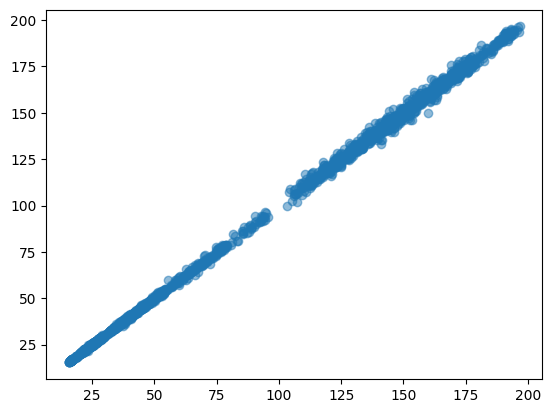

In [20]:
plt.scatter(df['Close'], df['Open'], alpha = 0.5)

***REGRESSION is a measure of the relation between the mean value of one variable (e.g. output) and corresponding values of other variables***

In [24]:
df.shape


(2516, 5)

In [25]:
from sklearn.linear_model import LinearRegression

x = np.array(df['Open']).reshape(2516, -2)
y = np.array(df['Close'])

LR = LinearRegression().fit(x, y)
LR.score(x, y)

0.9993997391703943

In [26]:
LR.coef_

array([1.00067419])

In [27]:
LR.intercept_

np.float64(0.011873966293407534)

In [28]:
LR.predict(x)

array([ 17.29560566,  17.20789358,  16.72858276, ..., 191.23133419,
       192.87043521, 192.63200986], shape=(2516,))

***Elementary Probability Theory the outcome that could happen:***

**Monte Carlo method is an experimentals of computational algorithms that rely on repeated random samples**

In [30]:
df["Returns"] = df['Close'].pct_change()
df['Returns'] = df['Returns'].dropna()

df.dropna()

Price,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600,-0.021966
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800,0.005453
2014-01-07,16.785946,16.969955,16.720051,16.918980,317209200,-0.007152
2014-01-08,16.892250,16.957523,16.743986,16.747714,258529600,0.006333
2014-01-09,16.676537,16.997932,16.640169,16.996067,279148800,-0.012770
...,...,...,...,...,...,...
2023-12-22,192.192551,193.989390,191.567126,193.761051,37122800,-0.005547
2023-12-26,191.646576,192.480466,191.428174,192.202502,28919300,-0.002841
2023-12-27,191.745819,192.093281,189.700797,191.090629,48087700,0.000518


In [33]:
values = []
S = df['Returns'][-1] #starting stock price
T = 252  #Number of trading days
mu = df['Returns'].mean()  
sigma = df['Returns'].std()*math.sqrt(252) #volatility

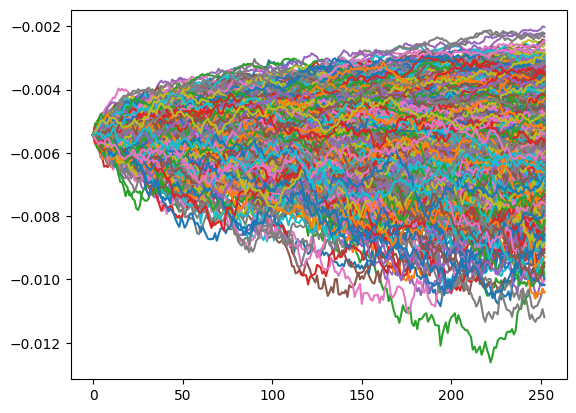

In [35]:
for i in range(1000):
    # Create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,sigma/math.sqrt(T),T)+1
    
    # Set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    # Plot the data
    plt.plot(price_list)
plt.show()

***RANDOM VARIABLES AND PROBABILITY DISTRIBUTIONS***

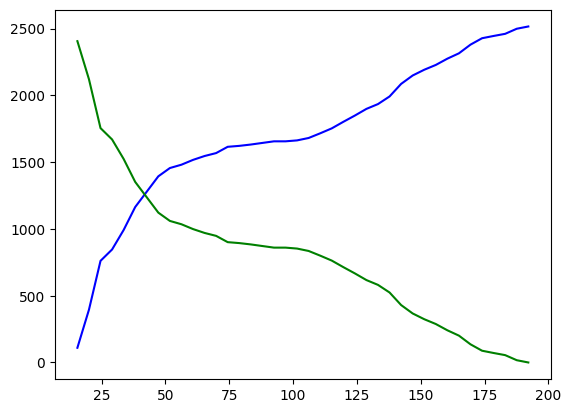

In [36]:
#CUMULATIVE DISTRIBUTION

data = df['Close']
values, base = np.histogram(data, bins = 40)

#evaluate the cumulative
cumulative = np.cumsum(values)

#plot the cumulative functions
plt.plot(base[: -1], cumulative, c = 'blue')

#plot the survival function
plt.plot(base[: -1], len(data) - cumulative, c = 'green')

***PROBABILITY DENSITY FUNCTION***


PDF is continuous random variable and have value that is given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample

Text(0.5, 1.0, 'Probability Density Function')

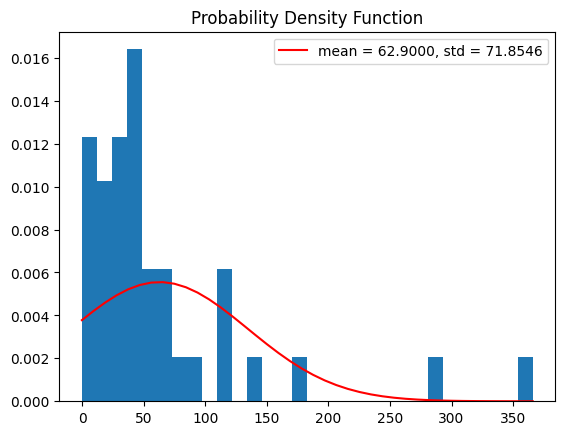

In [43]:
value = df['Returns'][1:]
x = np.linspace(value.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc = loc, scale = scale)
label = 'mean = %.4f, std = %.4f' % (loc, scale)

fig, ax = plt.subplots()
ax.hist(values, bins =30, density = True)
ax.plot(x, param_density, 'r-', label = label)
ax.legend(loc = 'best')
ax.set_title("Probability Density Function")


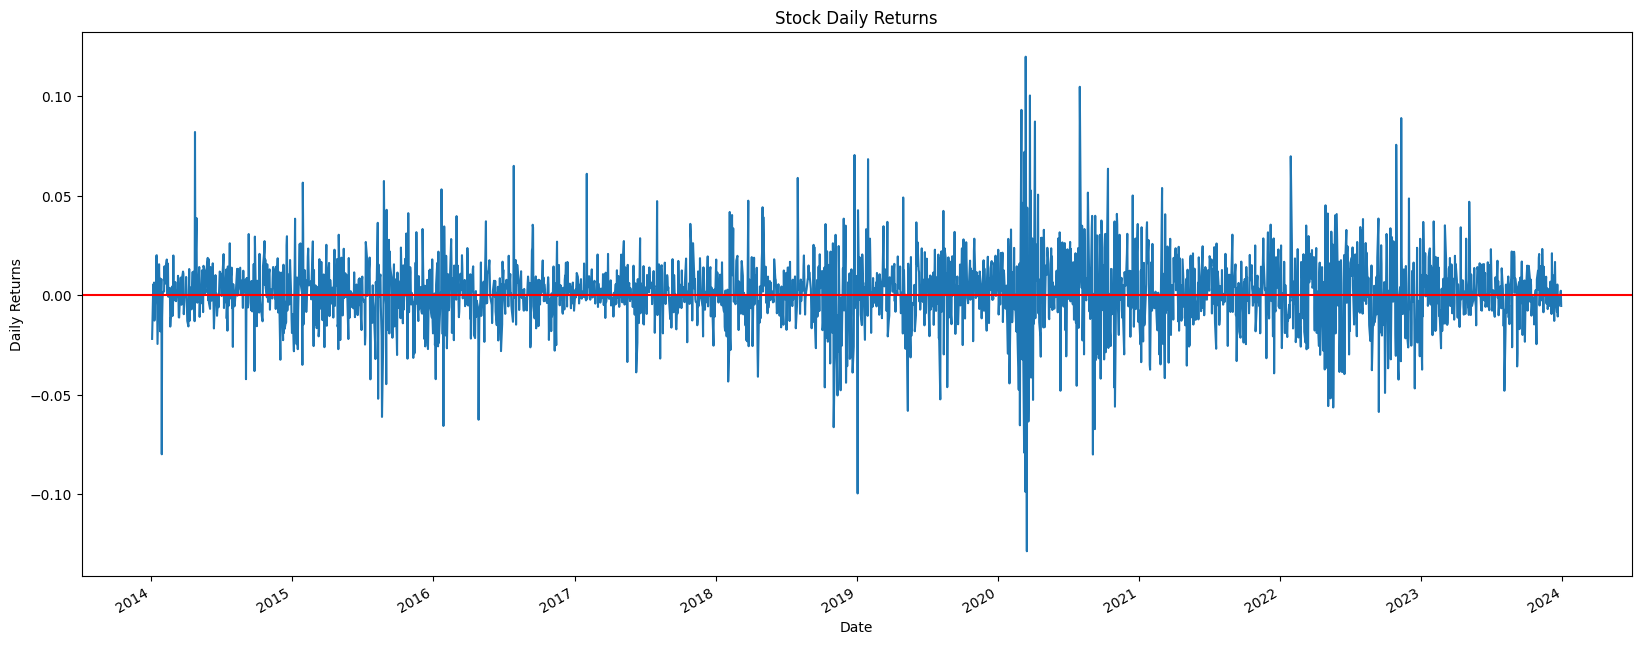

In [44]:
#log return goes up and down during the period

df['Returns'].plot(figsize=(20,8))
plt.title("Stock Daily Returns")
plt.axhline(0, color = 'Red')
plt.ylabel('Daily Returns')
plt.show()

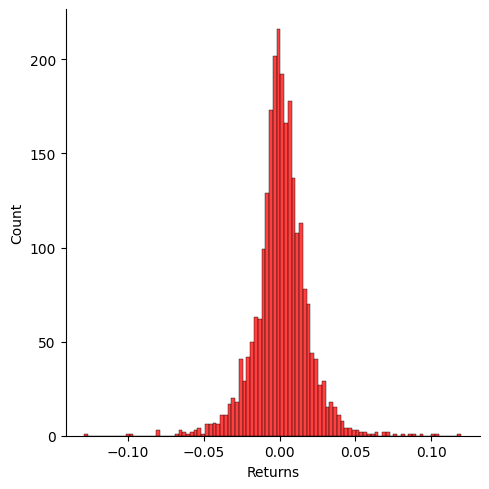

In [42]:
sns.displot(df['Returns'].dropna(), bins = 100, color = 'red')

***CUMULATIVE PROBABILITY DISTRIBUTION***

Text(0.5, 1.0, 'Cumulative Probability Distribution')

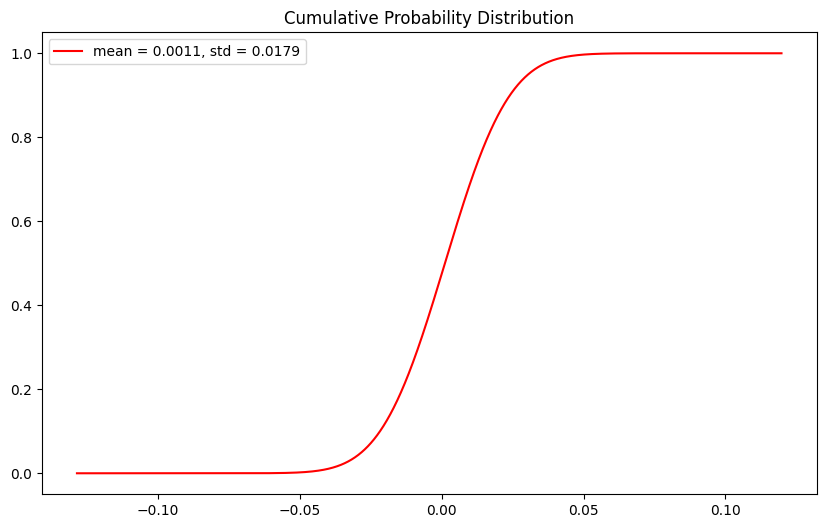

In [47]:
values = df['Returns'][1:]
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc = loc, scale = scale)
label = 'mean = %.4f, std = %.4f' % (loc, scale)

fig, ax = plt.subplots(figsize = (10, 6))
#ax.hist(values, bins = 30, density=True)
ax.plot(x, param_density, 'r-', label = label)
ax.legend(loc = 'best')
ax.set_title("Cumulative Probability Distribution")

***BINOMIAL DISTRIBUTION***

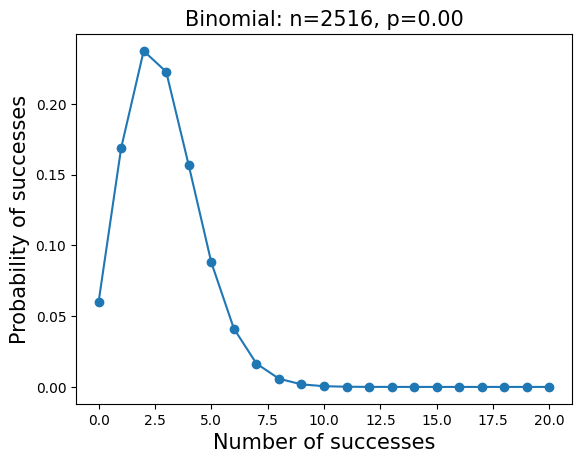

In [51]:
from scipy.stats import binom

n = len(df['Returns'])
p = df['Returns'].mean()
k = np.arange(0, 21)
binomianl = binom.pmf(k, n, p)

plt.plot(k, binomianl, 'o-')
plt.title("Binomial: n=%i, p=%.2f" % (n,p), fontsize=15)
plt.xlabel("Number of successes", fontsize=15)
plt.ylabel("Probability of successes", fontsize=15)
plt.show()


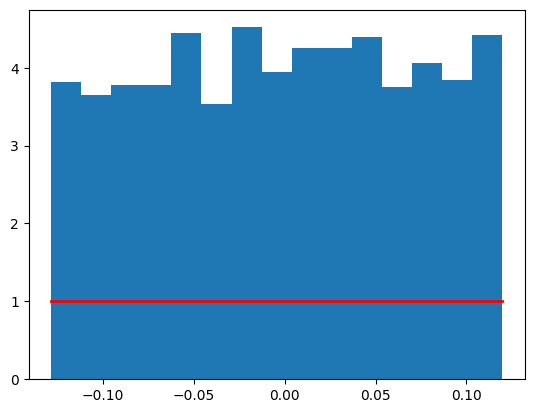

In [52]:
s = np.random.uniform(values.min(), values.max(), len(values))

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density = True)
plt.plot(bins, np.ones_like(bins), linewidth = 2, color = 'r')
plt.show()

Mean: 2.808700
SD: 1.676062


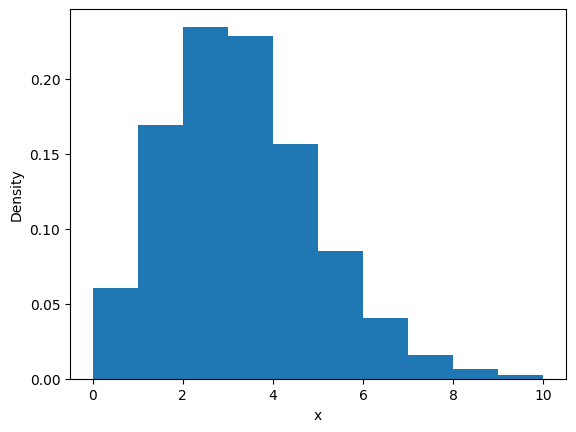

In [55]:
binom_sim = binom.rvs(n = n, p = p, size=10000)
print("Mean: %f" % np.mean(binom_sim))
print("SD: %f" % np.std(binom_sim, ddof=1))
plt.hist(binom_sim, bins = 10, density = True)
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

***POISSON DISTRIBUTION***

In [56]:
rate = 3  #error rate
n = np.arange(0, 10) # number of trials
y = stats.poisson.pmf(n, rate)

y

array([0.04978707, 0.14936121, 0.22404181, 0.22404181, 0.16803136,
       0.10081881, 0.05040941, 0.02160403, 0.00810151, 0.0027005 ])

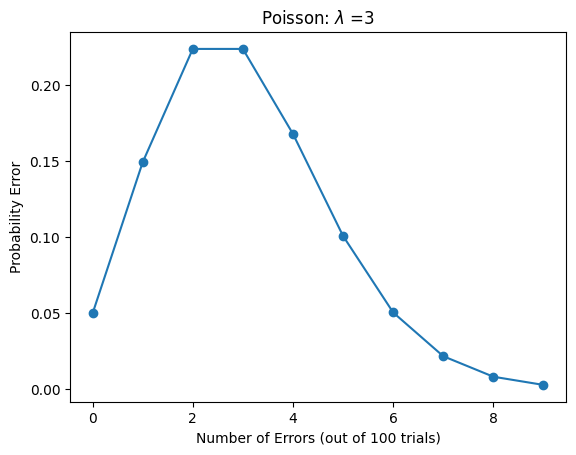

In [57]:
plt.plot(n, y, 'o-')
plt.title('Poisson: $\lambda$ =%i' % rate)
plt.ylabel('Probability Error')
plt.xlabel('Number of Errors (out of 100 trials)')
plt.show()

Mean: 3.240000
Standard Deviation: 1.621323


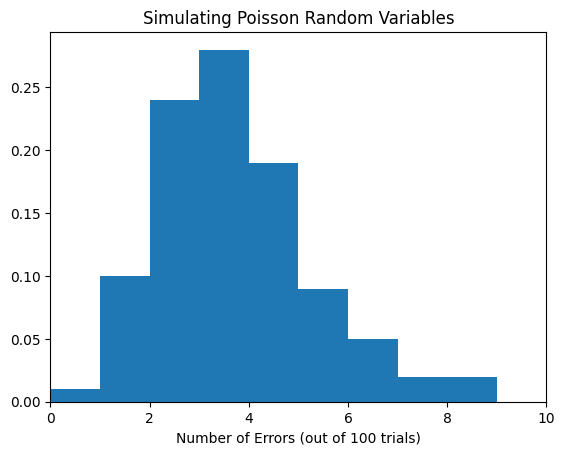

In [59]:
data = stats.poisson.rvs(mu=3, loc=0, size=100)
print("Mean: %f" % np.mean(data))
print("Standard Deviation: %f" % np.std(data, ddof=1))

plt.hist(data, bins = 9, density = True)
plt.xlim(0,10)
plt.xlabel('Number of Errors (out of 100 trials)')
plt.title('Simulating Poisson Random Variables')
plt.show()

***BETA DISTRIBUTION***

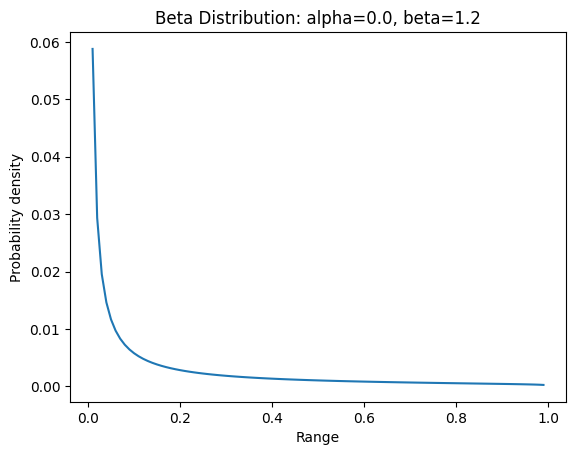

In [60]:
alpha = alpha 
beta = beta
x = np.arange(0, 1, 0.01)
y = stats.beta.pdf(x, alpha, beta)
plt.plot(x, y)
plt.title('Beta Distribution: alpha=%.1f, beta=%.1f' % (alpha,beta))
plt.xlabel('Range')
plt.ylabel('Probability density')
plt.show()

***EXPONENTIAL DISTRIBUTION***

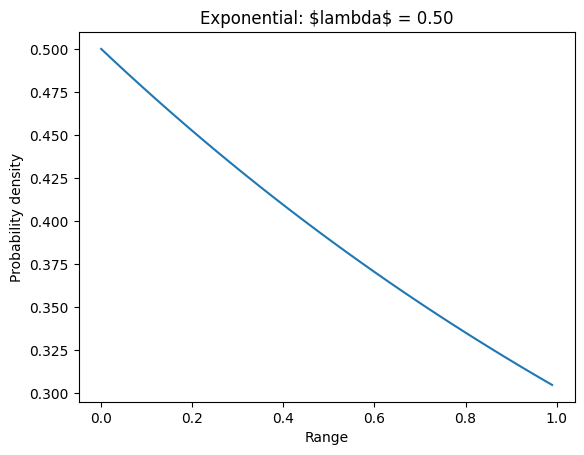

In [61]:
lambd = 0.5 #lambda
x = np.arange(0, 1, 0.01)
y = lambd * np.exp(-lambd * x)
plt.plot(x, y)
plt.title('Exponential: $lambda\$ = %.2f' % lambd)
plt.xlabel("Range")
plt.ylabel("Probability density")
plt.show()

***LOGNORMAL DISTRIBUTION***

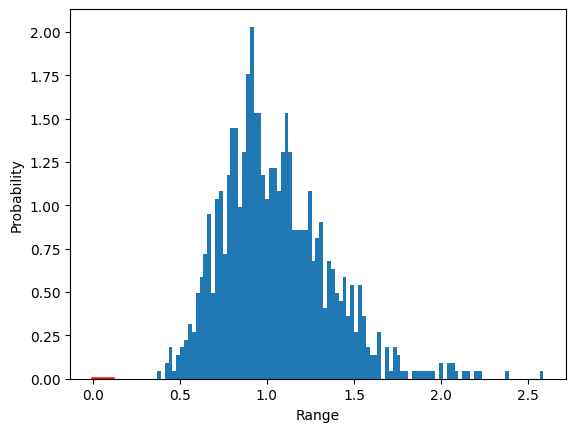

In [66]:
from scipy.stats import lognorm

s = np.random.lognormal(mu, sigma, 1000)

count, bias, ignored = plt.hist(s, 100, density = True, align = 'mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.axis('tight')
plt.show()